In [161]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [162]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import random
from sklearn.tree import export_graphviz
from IPython.display import SVG
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score


# You may need to install the Python graphviz library. At the command line:
#   pip install graphviz
# You will also need to install the graphviz executables. You can use apt,
# macports, or other installer for your system.
from graphviz import Source

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [163]:
asteroids = pd.read_csv("/content/gdrive/MyDrive/PHD/CS 6830/Project8/neo_v2.csv")
asteroids

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


In [164]:
asteroids = asteroids.rename({}, axis=1)

In [165]:
feature_cols = ['est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude','est_diameter_min']
X = asteroids[feature_cols]
y = asteroids.hazardous
treeclf = DecisionTreeClassifier(max_depth=3)
treeclf.fit(X.values, y)

DecisionTreeClassifier(max_depth=3)

In [166]:
with open("3LevelsTree.dot", 'w') as f:

    dot = tree.export_graphviz(treeclf, out_file=None,
                                    feature_names=feature_cols,
                                    class_names=['False','True'], filled = True)

    f.write(dot)

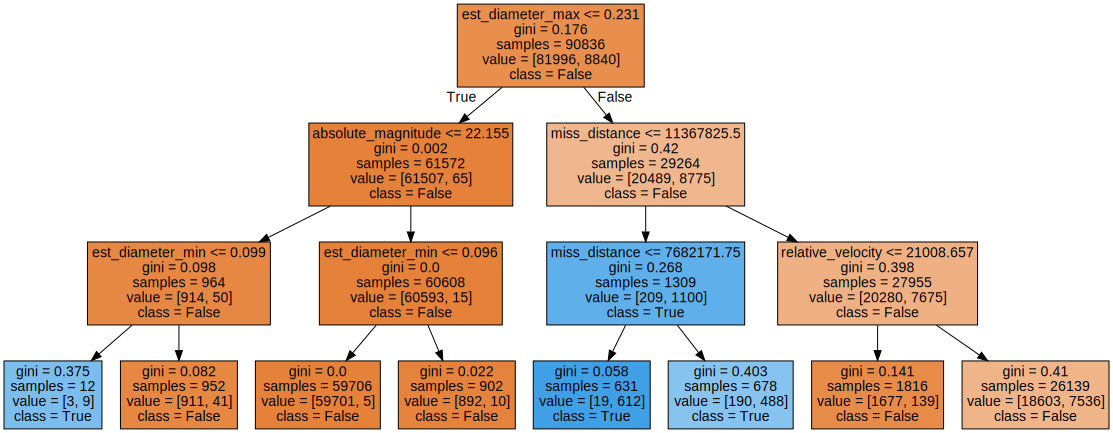

Cross-validation scores: [0.88469762 0.88083147 0.88252713 0.88531348 0.87919198 0.87940296
 0.88525072 0.88133457 0.88365376 0.87977239]
Mean accuracy: 0.8821976069691824
[0.88469762 0.88083147 0.88252713 0.88531348 0.87919198 0.87940296
 0.88525072 0.88133457 0.88365376 0.87977239]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


'f-score = [0.9536881 0.2182856]'

'recall = [0.99741451 0.12545249]'

'precision = [0.91363459 0.83951552]'

'support = [81996  8840]'

In [167]:
graph = Source(dot)
svg = SVG(graph.pipe(format='svg'))
display(svg)

cv_scores = cross_val_score(treeclf, X, y, cv=10, scoring = 'f1_weighted')  # 10-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy of cross-validation
print("Mean accuracy:", cv_scores.mean())
print(cv_scores)

y_pred = treeclf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
display('f-score = {}'.format(f))
display('recall = {}'.format(r))
display('precision = {}'.format(p))
display('support = {}'.format(s))

In [168]:
# Get a random sample to see how it does
n = asteroids.shape[0]
i = random.randint(0, n)
# i = 15 # an interesting case
i = 1
sample = asteroids.iloc[i]
print('Sample patient {} to test on. Tree classified as {}'.format(i, treeclf.predict([sample[feature_cols]])))
display(sample)

Sample patient 1 to test on. Tree classified as [False]


id                              2277475
name                  277475 (2005 WK4)
est_diameter_min                 0.2658
est_diameter_max               0.594347
relative_velocity          73588.726663
miss_distance           61438126.523951
orbiting_body                     Earth
sentry_object                     False
absolute_magnitude                 20.0
hazardous                          True
Name: 1, dtype: object

In [169]:
feature_cols = ['relative_velocity', 'miss_distance', 'absolute_magnitude','est_diameter_min','est_diameter_max']
X = asteroids[feature_cols]
y = asteroids.hazardous
treeclf = DecisionTreeClassifier(max_depth=6)
treeclf.fit(X.values, y)

DecisionTreeClassifier(max_depth=6)

In [170]:
with open("6LevelsTree.dot", 'w') as f:

    dot = tree.export_graphviz(treeclf, out_file=None,
                                    feature_names=feature_cols,
                                    class_names=['False','True'], filled = True)

    f.write(dot)

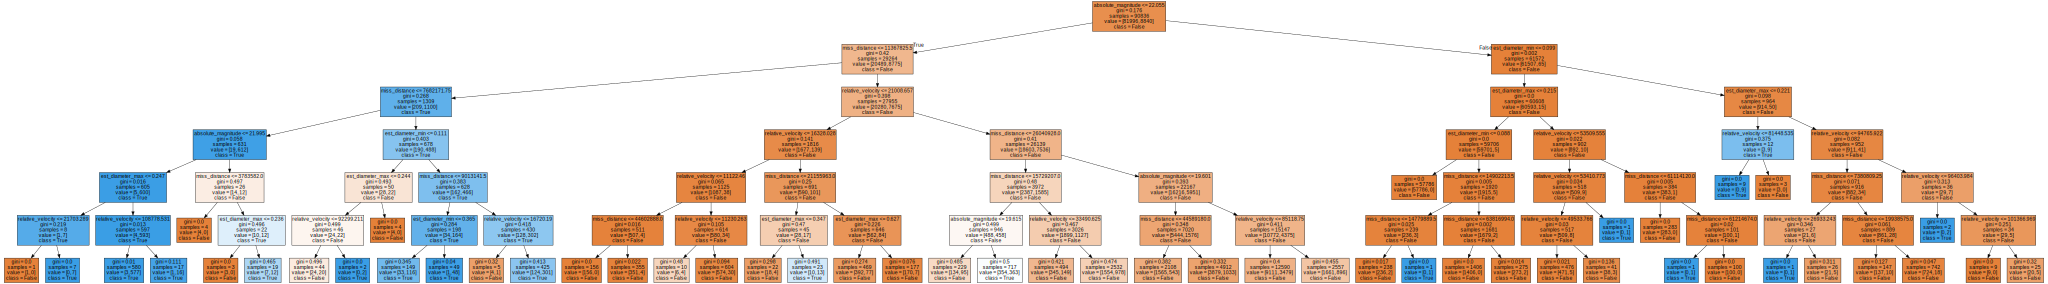

In [171]:
graph = Source(dot)
svg = SVG(graph.pipe(format='svg'))
display(svg)

In [172]:
n = asteroids.shape[0]
i = random.randint(0, n)
# i = 15 # an interesting case
i = 23425
sample = asteroids.iloc[i]
print('Sample patient {} to test on. Tree classified as {}'.format(i, treeclf.predict([sample[feature_cols]])))
display(sample)

Sample patient 23425 to test on. Tree classified as [False]


id                              2216523
name                  216523 (2001 HY7)
est_diameter_min                0.20163
est_diameter_max               0.450858
relative_velocity          32671.107234
miss_distance           35559338.810306
orbiting_body                     Earth
sentry_object                     False
absolute_magnitude                 20.6
hazardous                          True
Name: 23425, dtype: object

In [173]:
cv_scores = cross_val_score(treeclf, X, y, cv=10, scoring='f1_weighted')  # 10-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy of cross-validation
print("Mean accuracy:", cv_scores.mean())
y_pred = treeclf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
display('f-score = {}'.format(f))
display('recall = {}'.format(r))
display('precision = {}'.format(p))
display('support = {}'.format(s))

Cross-validation scores: [0.8841928  0.88469204 0.88391921 0.88688052 0.88393961 0.88110185
 0.88546557 0.88155595 0.88350882 0.87938412]
Mean accuracy: 0.8834640496838488


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


'f-score = [0.95373736 0.27114267]'

'recall = [0.99349968 0.16628959]'

'precision = [0.91703534 0.73389915]'

'support = [81996  8840]'

In [174]:
asteroids_majority = asteroids[asteroids['hazardous'] == False]
asteroids_minority = asteroids[asteroids['hazardous'] == True]

# Downsample majority class
df_majority_downsampled = asteroids_majority.sample(n=len(asteroids_minority), random_state=42)

# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_majority_downsampled, asteroids_minority])

In [175]:
df_balanced.hazardous[df_balanced.hazardous == True].count()

8840

In [176]:
df_balanced.hazardous[df_balanced.hazardous == False].count()

8840

In [177]:
feature_cols = ['est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude','est_diameter_min']
X = df_balanced[feature_cols]
y = df_balanced.hazardous
treeclf = DecisionTreeClassifier(max_depth=3)
treeclf.fit(X.values, y)

DecisionTreeClassifier(max_depth=3)

In [178]:
with open("3LevelsTreeBalanced.dot", 'w') as f:

    dot = tree.export_graphviz(treeclf, out_file=None,
                                    feature_names=feature_cols,
                                    class_names=['False','True'], filled = True)

    f.write(dot)

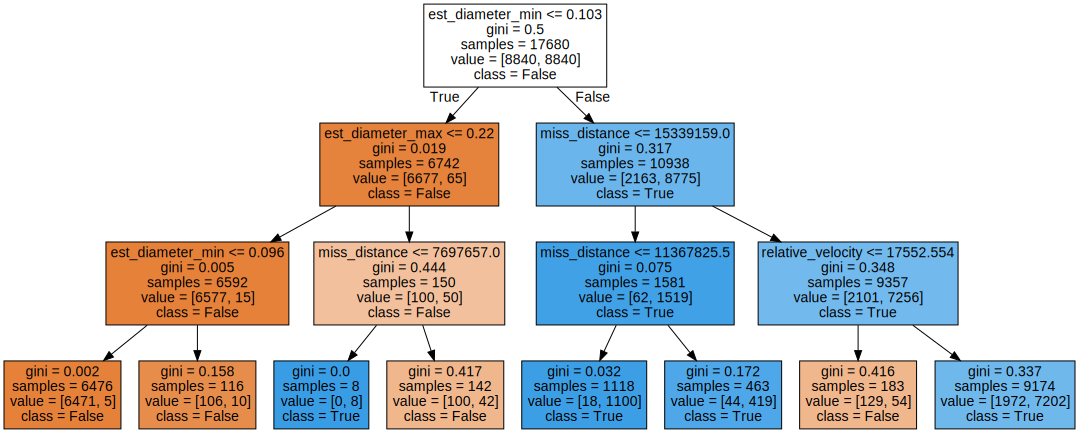

Cross-validation scores: [0.88537952 0.8966581  0.88659794 0.8910387  0.89785495 0.87947554
 0.8954615  0.88202532 0.89355169 0.89318413]
Mean accuracy: 0.890122738439995


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


'f-score = [0.86387003 0.89057797]'

'recall = [0.7699095  0.98744344]'

'precision = [0.98395258 0.81101923]'

'support = [8840 8840]'

In [179]:

graph = Source(dot)
svg = SVG(graph.pipe(format='svg'))
display(svg)


cv_scores = cross_val_score(treeclf, X, y, cv=10, scoring='f1')  # 10-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy of cross-validation
print("Mean accuracy:", cv_scores.mean())

y_pred = treeclf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
display('f-score = {}'.format(f))
display('recall = {}'.format(r))
display('precision = {}'.format(p))
display('support = {}'.format(s))

In [180]:
treeclf = DecisionTreeClassifier(max_depth=6)
treeclf.fit(X.values, y)

DecisionTreeClassifier(max_depth=6)

In [181]:
with open("6LevelsTreeBalanced.dot", 'w') as f:

    dot = tree.export_graphviz(treeclf, out_file=None,
                                    feature_names=feature_cols,
                                    class_names=['False','True'], filled = True)

    f.write(dot)

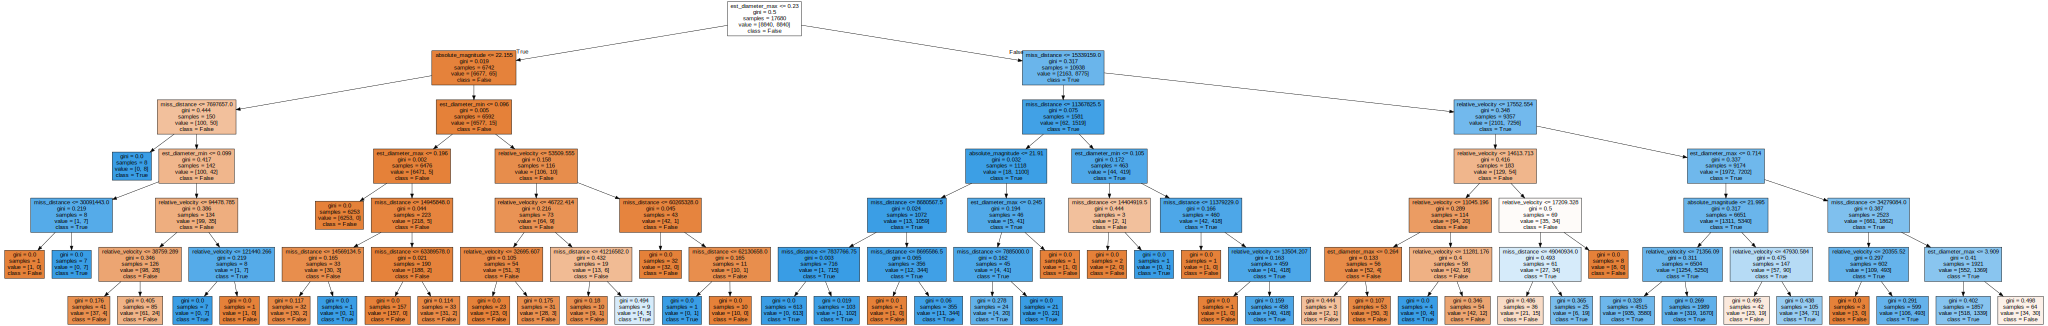

Cross-validation scores: [0.8877551  0.89326425 0.89082522 0.89183673 0.89662231 0.87626775
 0.89521872 0.88324873 0.89435897 0.89115994]
Mean accuracy: 0.8900557727173408


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


'f-score = [0.86761917 0.89284618]'

'recall = [0.77624434 0.98687783]'

'precision = [0.98337633 0.81517473]'

'support = [8840 8840]'

In [182]:
graph = Source(dot)
svg = SVG(graph.pipe(format='svg'))
display(svg)


cv_scores = cross_val_score(treeclf, X, y, cv=10, scoring='f1')  # 10-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy of cross-validation
print("Mean accuracy:", cv_scores.mean())

y_pred = treeclf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
display('f-score = {}'.format(f))
display('recall = {}'.format(r))
display('precision = {}'.format(p))
display('support = {}'.format(s))

In [183]:
import pandas as pd
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    auc,
    precision_recall_curve
)
import numpy as np
import matplotlib.pyplot as plt

In [291]:
# Load data
data_path = '/content/gdrive/MyDrive/PHD/CS 6830/Project8/neo_v2.csv'
data = pd.read_csv(data_path)

# Select features and target variable
features = data[['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'sentry_object',
                 'absolute_magnitude']].copy()
target = data['hazardous']

# Convert boolean features to integers
features['sentry_object'] = features['sentry_object'].astype(int)

# Filter out the first 74,000 non-hazardous entries
hazardous = data[data['hazardous'] == True]
non_hazardous = data[data['hazardous'] == False].iloc[74000:]

# Concatenate the remaining entries to form a balanced dataset
balanced_data = pd.concat([hazardous, non_hazardous])

# Select features and target variable from the balanced dataset
features_balanced = balanced_data[['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'sentry_object', 'absolute_magnitude']].copy()
target_balanced = balanced_data['hazardous']

# Convert boolean features to integers
features_balanced['sentry_object'] = features_balanced['sentry_object'].astype(int)

# Split the balanced data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(features_balanced, target_balanced, test_size=0.2, random_state=42)


# Define model architecture
def create_model_architecture(input_shape, layers):
    model = Sequential([Input(shape=input_shape)])
    for layer in layers:
        model.add(Dense(layer, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model


# Instantiate and compile models
input_shape = (X_train.shape[1],)
layers_list = [[10], [20, 10], [30, 20, 10]]  # Define three different architectures
models = [create_model_architecture(input_shape, layers) for layers in layers_list]

Training model...
Epoch 1/25
337/337 [==============================] - 3s 5ms/step - loss: 124999.9922 - accuracy: 0.5174 - val_loss: 662.6766 - val_accuracy: 0.4792
Epoch 2/25
337/337 [==============================] - 1s 4ms/step - loss: 6701.4590 - accuracy: 0.5095 - val_loss: 8605.1016 - val_accuracy: 0.4684
Epoch 3/25
337/337 [==============================] - 2s 5ms/step - loss: 6836.1343 - accuracy: 0.4943 - val_loss: 11237.6953 - val_accuracy: 0.5316
Epoch 4/25
337/337 [==============================] - 1s 2ms/step - loss: 6555.6909 - accuracy: 0.5091 - val_loss: 10453.6025 - val_accuracy: 0.4744
Epoch 5/25
337/337 [==============================] - 1s 2ms/step - loss: 6834.9004 - accuracy: 0.5009 - val_loss: 26129.3906 - val_accuracy: 0.5282
Epoch 6/25
337/337 [==============================] - 1s 2ms/step - loss: 6700.4858 - accuracy: 0.4991 - val_loss: 8104.4438 - val_accuracy: 0.4636
Epoch 7/25
337/337 [==============================] - 1s 2ms/step - loss: 7470.3174 - accu

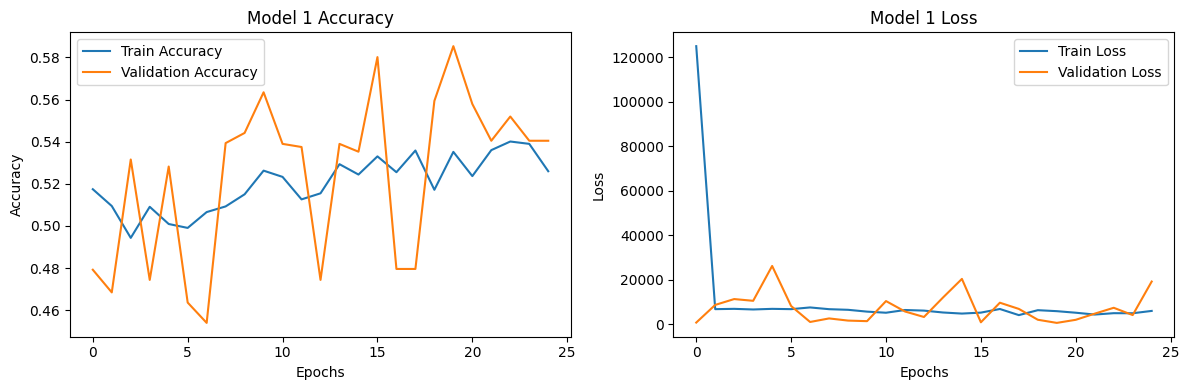

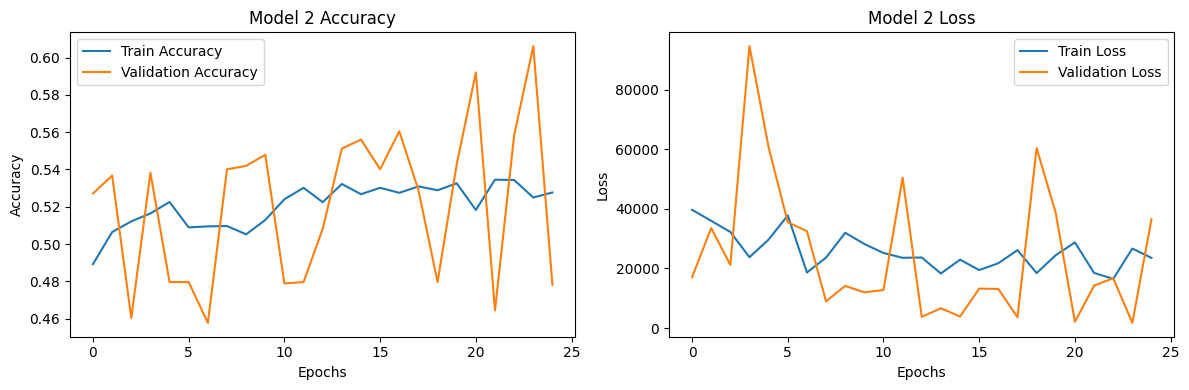

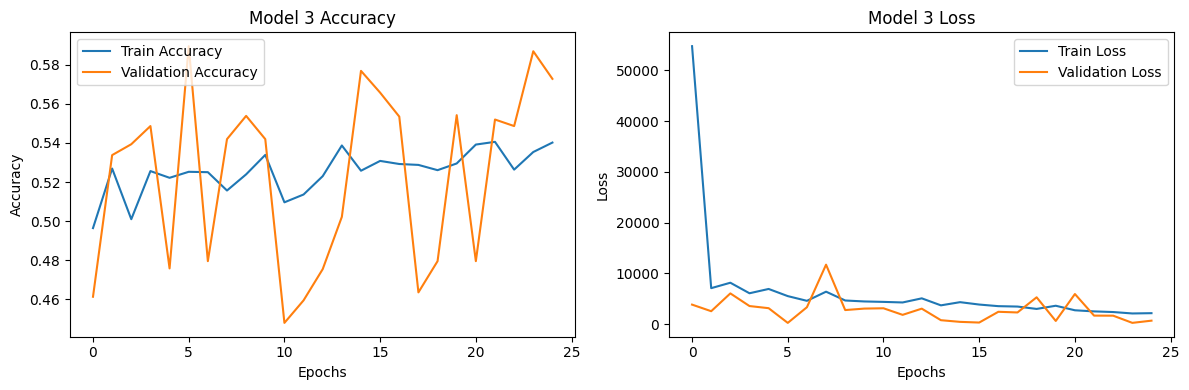

In [292]:
for model in models:
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

from tensorflow.keras.utils import plot_model

# Train models and save history
history_list = []
for model in models:
    print("Training model...")
    history = model.fit(X_train, Y_train, epochs=25, batch_size=32, validation_split=0.2, verbose=1)
    history_list.append(history)

# Visualize training and validation accuracy and loss
for i, history in enumerate(history_list):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model {i + 1} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model {i + 1} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [293]:
# Evaluate model performance and use AUC-ROC and PR curves
for i, model in enumerate(models):
    y_pred_proba = model.predict(X_test).ravel()
    y_pred = (y_pred_proba > 0.5).astype(int)

    auc_roc = roc_auc_score(Y_test, y_pred_proba)
    precision, recall, _ = precision_recall_curve(Y_test, y_pred_proba)
    auc_pr = auc(recall, precision)

    print(f"Model {i + 1} Performance:")
    print(f"AUC-ROC: {auc_roc}")
    print(f"AUC-PR: {auc_pr}\n")

106/106 [==============================] - 0s 1ms/step
Model 1 Performance:
AUC-ROC: 0.5319574228346277
AUC-PR: 0.7680758330864648

106/106 [==============================] - 0s 1ms/step
Model 2 Performance:
AUC-ROC: 0.49890890273904626
AUC-PR: 0.5242054917681203

106/106 [==============================] - 0s 1ms/step
Model 3 Performance:
AUC-ROC: 0.5680869063030383
AUC-PR: 0.7617990436683966



In [294]:
import pandas as pd

# Store a list of model evaluation metrics
model_metrics = []

for i, model in enumerate(models):
    y_pred_proba = model.predict(X_test).ravel()
    y_pred = (y_pred_proba > 0.5).astype(int)

    auc_roc = roc_auc_score(Y_test, y_pred_proba)
    precision, recall, _ = precision_recall_curve(Y_test, y_pred_proba)
    auc_pr = auc(recall, precision)

    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred, zero_division=1)
    recall = recall_score(Y_test, y_pred, zero_division=1)
    f1 = f1_score(Y_test, y_pred, zero_division=1)

    model_metrics.append({
        'Model': f'Model {i + 1}',
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'AUC-ROC': auc_roc,
        'AUC-PR': auc_pr
    })

# Convert model evaluation metrics to DataFrame and print
metrics_df = pd.DataFrame(model_metrics)
print("Model Evaluation Metrics:")
print(metrics_df)

106/106 [==============================] - 0s 3ms/step
Model Evaluation Metrics:
     Model  Accuracy  Precision    Recall  F1-score   AUC-ROC    AUC-PR
0  Model 1  0.550475   0.536645  0.998289  0.698045  0.531957  0.768076
1  Model 2  0.481888   0.528571  0.042213  0.078183  0.498909  0.524205
2  Model 3  0.581354   0.559036  0.926412  0.697295  0.568087  0.761799


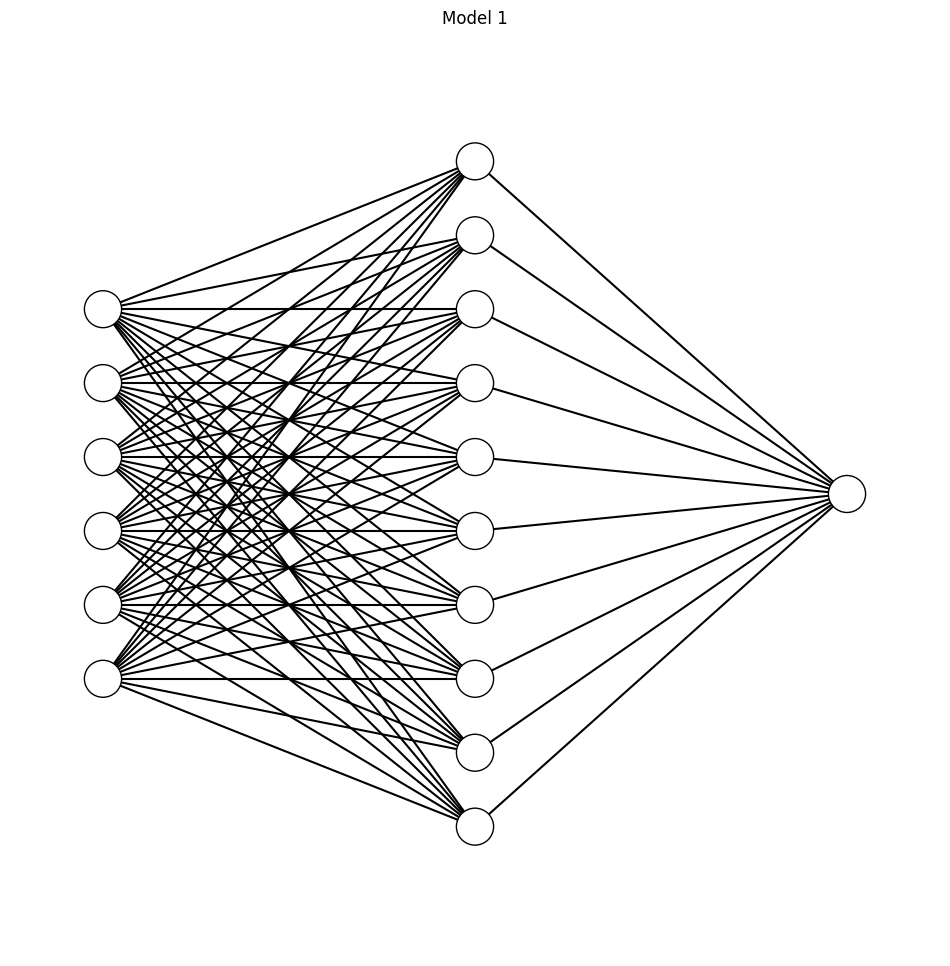

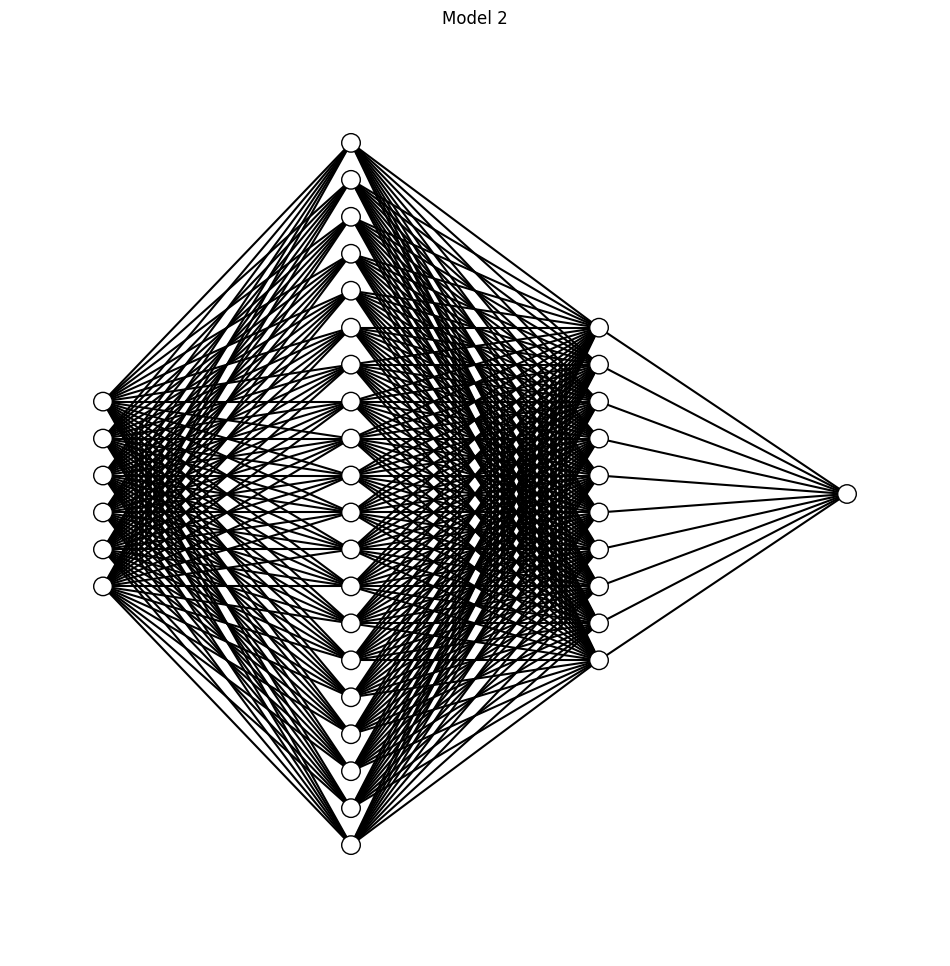

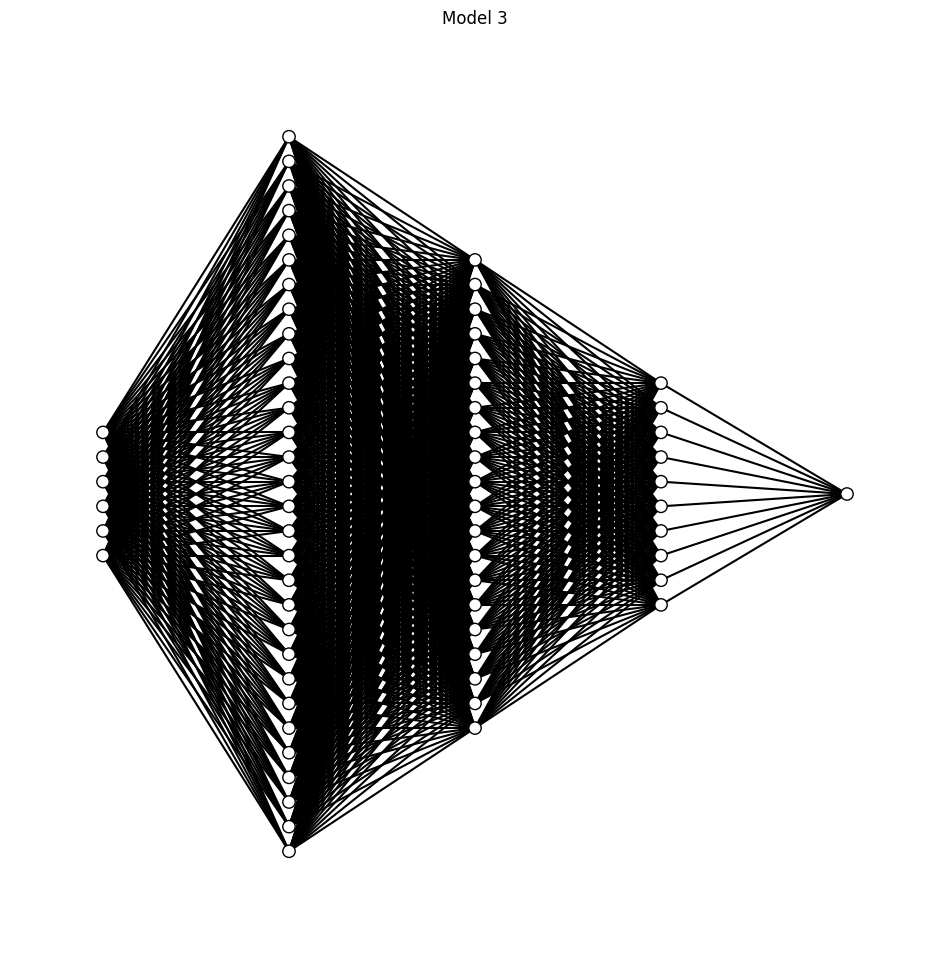

In [295]:
# Define a function to draw neural network
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float(len(layer_sizes) - 1)
    node_color = 'w'
    edge_color = 'k'

    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size):
            circle = plt.Circle((n * h_spacing + left, layer_top - m * v_spacing), v_spacing / 4.,
                                color=node_color, ec=edge_color, zorder=4)
            ax.add_artist(circle)

    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing * (layer_size_a - 1) / 2. + (top + bottom) / 2.
        layer_top_b = v_spacing * (layer_size_b - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n * h_spacing + left, (n + 1) * h_spacing + left],
                                  [layer_top_a - m * v_spacing, layer_top_b - o * v_spacing],
                                  c=edge_color)
                ax.add_artist(line)


# Set neural network layer structures
layer_sizes_list = [
    [6, 10, 1],  # Model 1: 6 input nodes, 10 hidden nodes, 1 output node
    [6, 20, 10, 1],
    # Model 2: 6 input nodes, 20 nodes in the first hidden layer, 10 nodes in the second hidden layer, 1 output node
    [6, 30, 20, 10, 1]
    # Model 3: 6 input nodes, 30 nodes in the first hidden layer, 20 nodes in the second hidden layer, 10 nodes in the third hidden layer, 1 output node
]

# Visualize each neural network structure separately
for i, layer_sizes in enumerate(layer_sizes_list):
    fig = plt.figure(figsize=(12, 12))
    ax = fig.gca()
    ax.axis('off')
    draw_neural_net(ax, .1, .9, .1, .9, layer_sizes)
    ax.set_title(f'Model {i + 1}')
    plt.show()